# Telco Churn Analysis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
## here Churn is target feature

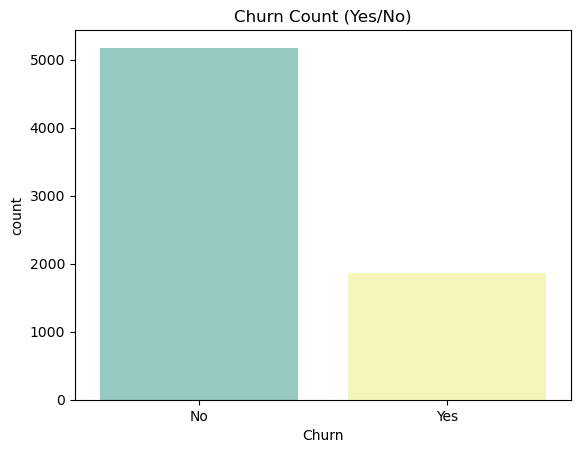

In [11]:
sns.countplot(data=df, x='Churn', palette="Set3")
plt.title("Churn Count (Yes/No)")
plt.xlabel= ("Churn")
plt.ylabel= ("Count")

In [12]:
df.drop('customerID', axis = 1, inplace=True)

In [13]:
df.dropna(how = 'any', inplace = True)

In [14]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [15]:
df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [16]:
df.drop('tenure', axis = 1, inplace=True)

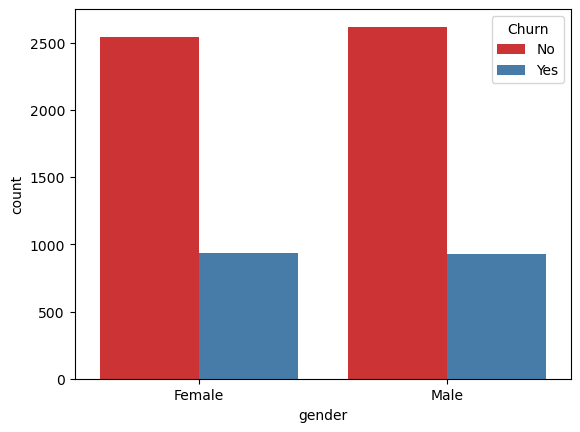

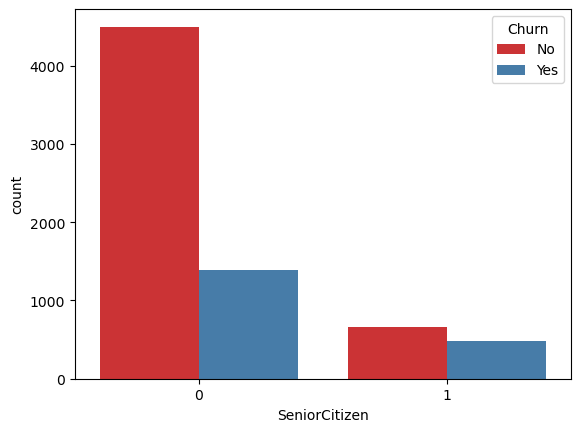

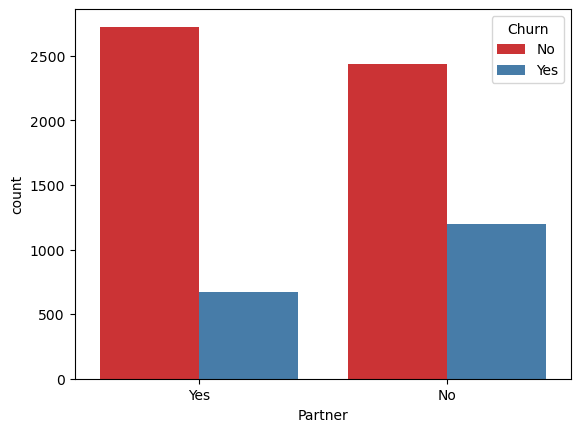

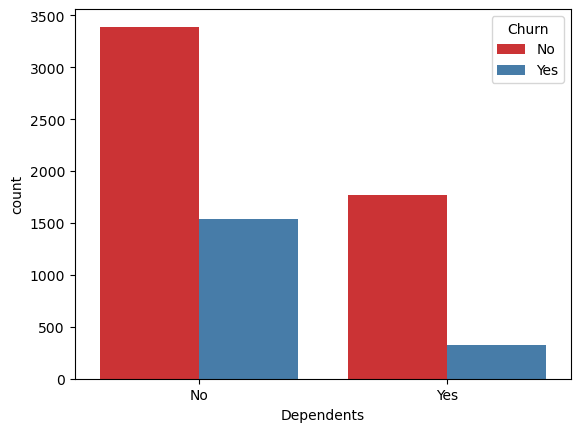

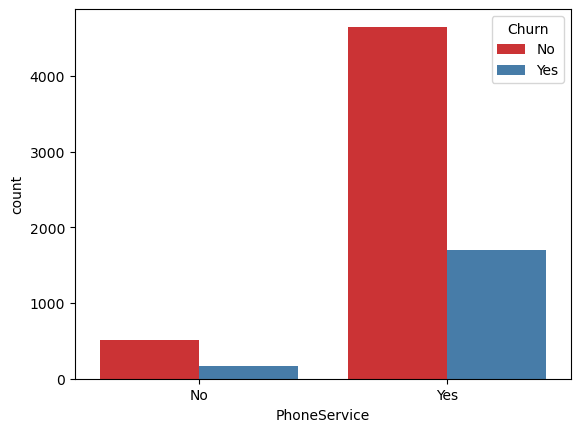

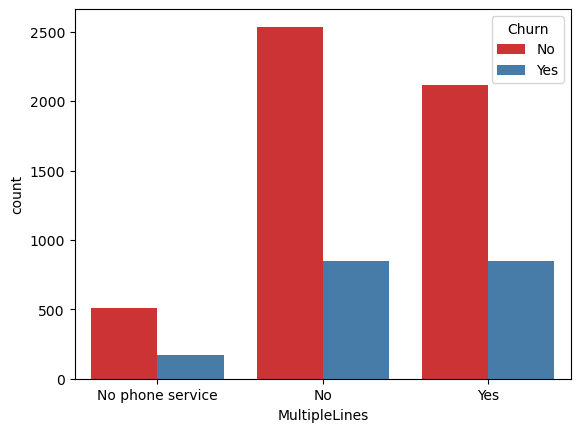

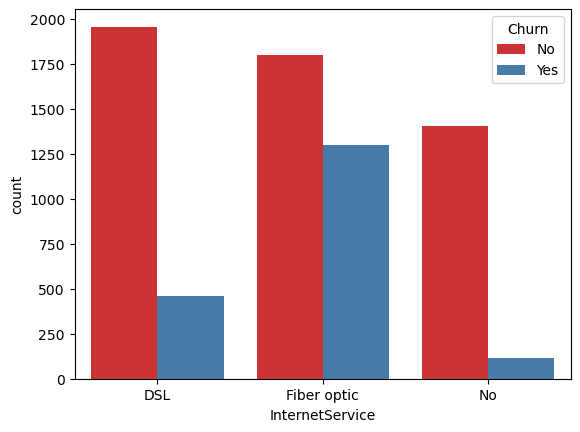

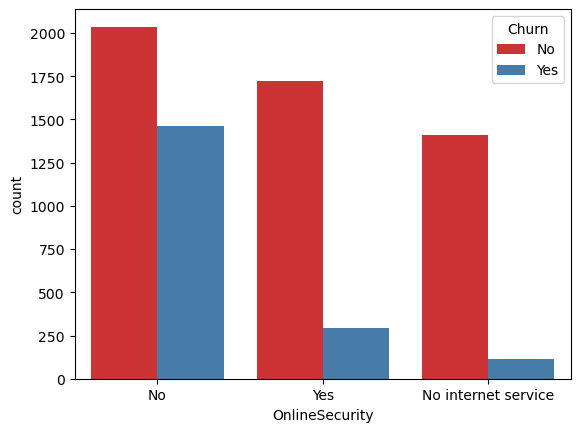

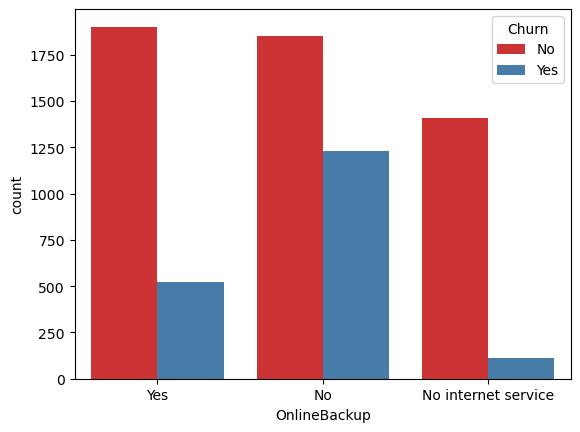

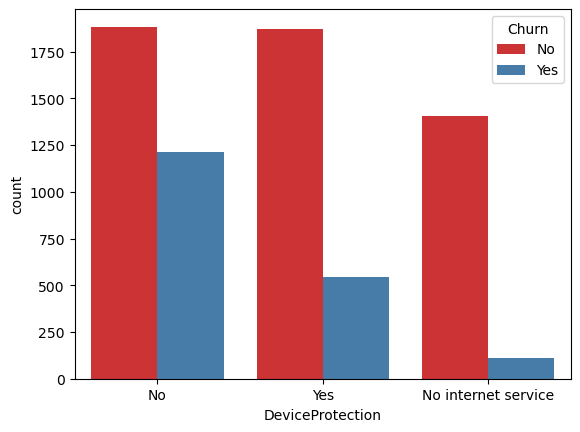

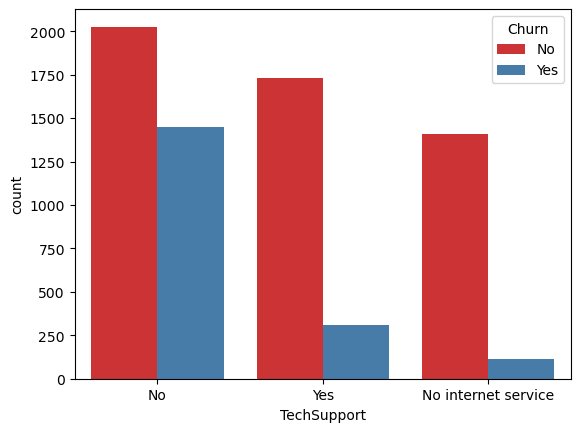

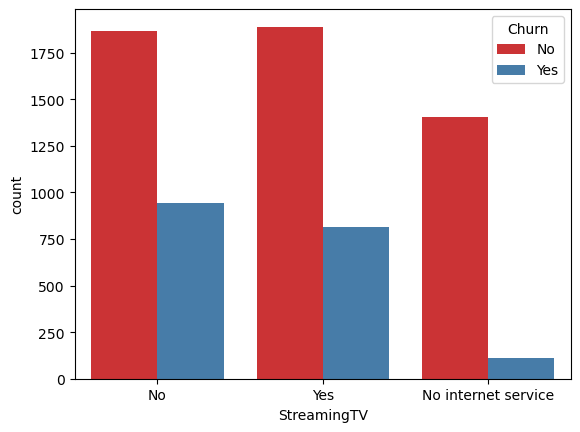

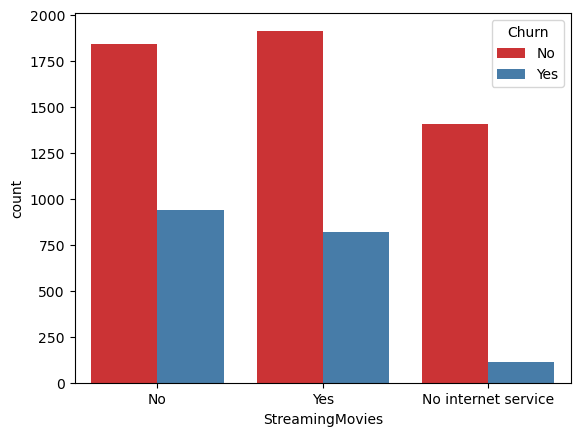

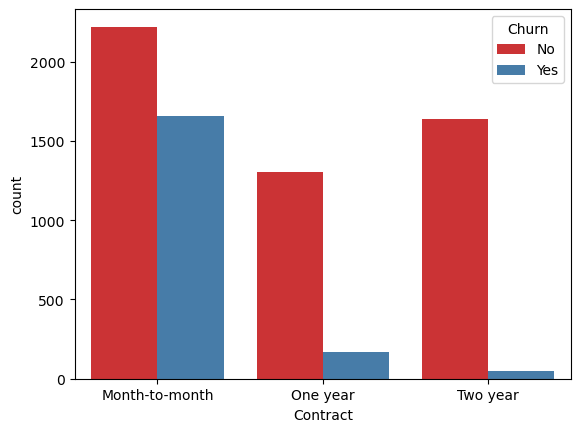

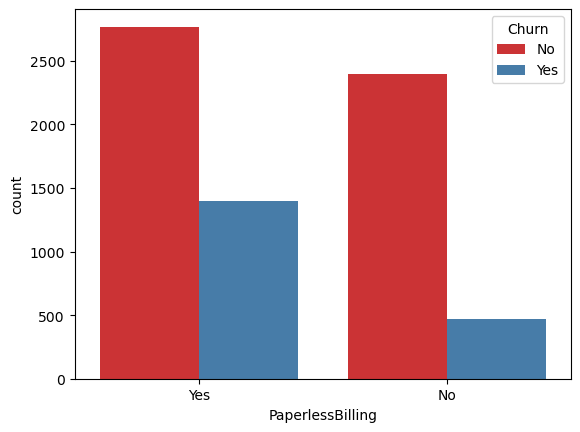

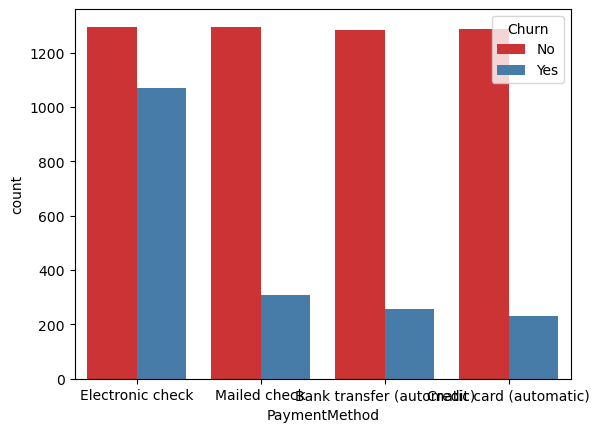

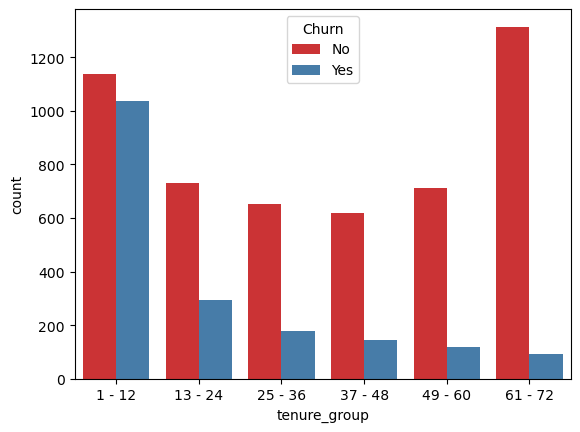

In [17]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn', palette="Set1")
    plt.show()

In [18]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)


In [19]:
def unique_items_in_columns(dataframe):
    unique_items = {}
    for column in dataframe.columns:
        unique_items[column] = dataframe[column].unique()
    return unique_items

In [20]:
uni = unique_items_in_columns(df)
for column, items in uni.items():
    print(f"Unique items in '{column}': {items}")


Unique items in 'gender': ['Female' 'Male']
Unique items in 'SeniorCitizen': [0 1]
Unique items in 'Partner': ['Yes' 'No']
Unique items in 'Dependents': ['No' 'Yes']
Unique items in 'PhoneService': ['No' 'Yes']
Unique items in 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique items in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique items in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique items in 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique items in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique items in 'TechSupport': ['No' 'Yes' 'No internet service']
Unique items in 'StreamingTV': ['No' 'Yes' 'No internet service']
Unique items in 'StreamingMovies': ['No' 'Yes' 'No internet service']
Unique items in 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique items in 'PaperlessBilling': ['Yes' 'No']
Unique items in 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique item

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns_to_encode = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'tenure_group'
]

for column in categorical_columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0


<Axes: >

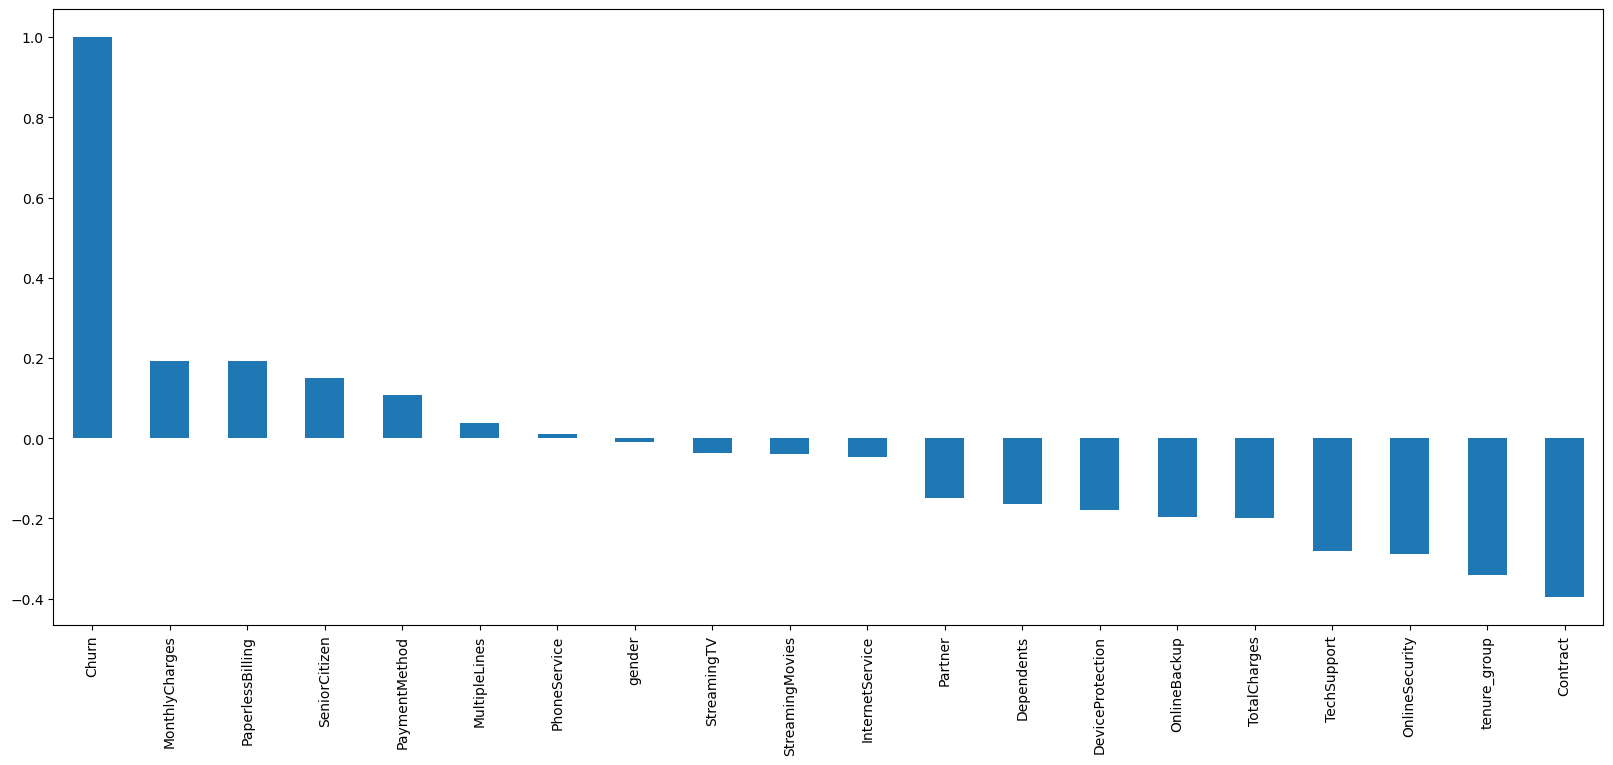

In [23]:
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

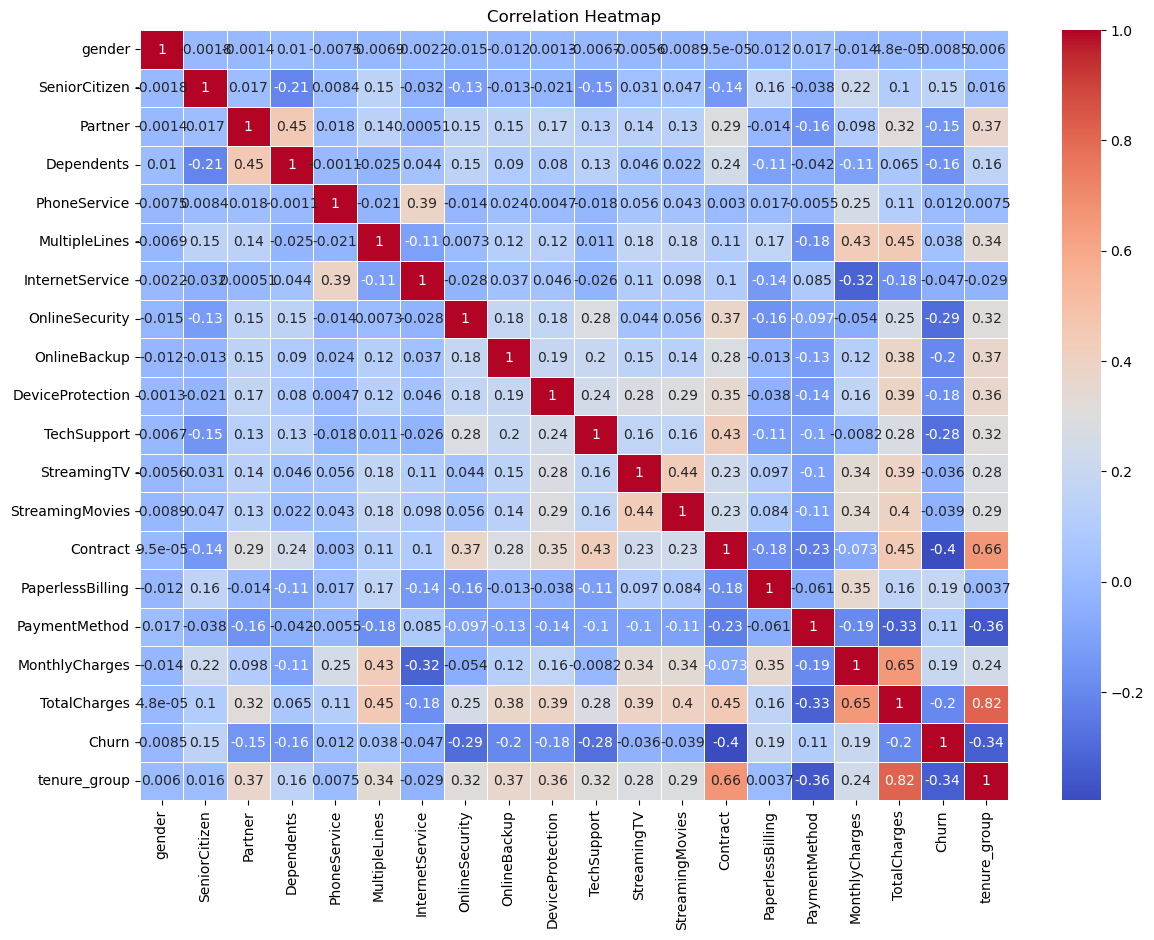

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
df.to_csv("Final_df.csv", index=False)
